# Applied Statistics - Assessment Problems
***

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using ```numpy``` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design

<style>
div.text_cell_render .MathJax_Display {
    text-align: center !important;
}
</style>

In [1]:
# Importing the required libraries.
# Mathematical functions from the standard library
import math 
# Permutations and combinations.
import itertools
# Random selection.
import random
# Numerical structures and operations.
import numpy as np 
# Plotting.
import matplotlib.pyplot as plt 

### Background: The Original Lady Tasting Tea

In Fisher’s classic experiment:
- Total cups: 8  
- 4 cups poured **tea first**
- 4 cups poured **milk first**

The lady claimed she could correctly identify which was which.

### Simulation Setup: Extended Experiment

We now have:
- **12 cups total**
- **8 tea-first**
- **4 milk-first**

We’ll calculate the number of possible combinations of selecting 4 milk-first cups out of 12 and determine the probability of guessing all correctly by chance.

#### Cups of Tea

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

#### Combinations using `math.comb(n, k)`

The function `math.comb(n, k)` calculates the number of ways (combinations) of choosing `k` elements from a set of `n` elements,  
where the order of selection does not matter and no element is chosen more than once.

- We have to be aware that both `n` and `k` must be _non-negative integers_ (whole numbers).  
- This means they can include _0_, so they are not restricted to natural numbers (which start from 1).  
- The function will raise a 'ValueError' if either `n` or `k` is negative or not an integer.  
- Additionally, `k` cannot be greater than `n`.

In our case, we use it to calculate the number of ways to select 4 milk-first cups from a total of 12 cups.

In [3]:
# Number of combinations of selecting four cups from 12.
no_comb = math.comb(no_cups, no_cups_milk_first)

# Show combinations.
no_comb

495

Based on the result, the participant (the “lady tasting tea”) has **1 in 495** chance of randomly getting all cups correct.

We can also verify this by manually computing the number of combinations.

In [4]:
# Manual calculation using ordered selection

# Number of ways to choose 4 cups out of 12 (order matters)
ways_ordered = 12 * 11 * 10 * 9
print("Number of ways to select 4 cups out of 12 (ordered):", ways_ordered)

# Number of ways to shuffle those 4 chosen cups
no_shuffles = 4 * 3 * 2 * 1
print("Number of ways to shuffle 4 cups:", no_shuffles)

# Number of combinations (order removed)
no_comb = ways_ordered // no_shuffles
print("Number of combinations:", no_comb)


Number of ways to select 4 cups out of 12 (ordered): 11880
Number of ways to shuffle 4 cups: 24
Number of combinations: 495


#### How Does `math.comb(n, k)` Work?

The formula for `math.comb(n, k)` is:

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

In our experiment:
- \( n = 12 \): total number of cups  
- \( k = 4 \): number of cups poured milk first

Breaking down the calculation:
- \( n! = 12! \)
- \( k! = 4! \)
- \( (n-k)! = (12 - 4)! = 8! \)

Substituting the values:

$\binom{12}{4} = \frac{12!}{4!(8)!} = 495 $

In [5]:
# Calculating the combination using the factorial formula from math.comb function.
n = 12
k = 4

math.factorial(n) // (math.factorial(k) * math.factorial(n - k))


495

#### Ordering Results

To represent each cup in the experiment, I’m creating a list of labels that correspond to the total number of cups.  
This allows me to easily track and reference each cup when simulating or shuffling their order later on.

I’m using the `list(range())` function to generate these labels:

- `range(no_cups + 1)` creates a sequence of numbers starting from 0 up to, but not including, `no_cups + 1`.  
- By adding one, the cups will be labeled from _1 to 12_ instead of starting at 0.
- Wrapping the range with `list()` converts that sequence into a list of labels.
- These numeric labels serve as unique identifiers for each cup in the experiment.


In [6]:
# The cup labels starting from one.
labels = list(range(1, no_cups + 1))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

_Displaying the Combinations_

I’m generating all possible combinations of cups that could have milk poured first `using itertools.combinations`. This creates a list of tuples, where each tuple represents one possible selection of 4 cups out of the 12.


In [7]:
# Displaying combinations.
combs = list(itertools.combinations(labels, no_cups_milk_first))
# Show.
combs

[(1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 3, 8),
 (1, 2, 3, 9),
 (1, 2, 3, 10),
 (1, 2, 3, 11),
 (1, 2, 3, 12),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 4, 8),
 (1, 2, 4, 9),
 (1, 2, 4, 10),
 (1, 2, 4, 11),
 (1, 2, 4, 12),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 5, 8),
 (1, 2, 5, 9),
 (1, 2, 5, 10),
 (1, 2, 5, 11),
 (1, 2, 5, 12),
 (1, 2, 6, 7),
 (1, 2, 6, 8),
 (1, 2, 6, 9),
 (1, 2, 6, 10),
 (1, 2, 6, 11),
 (1, 2, 6, 12),
 (1, 2, 7, 8),
 (1, 2, 7, 9),
 (1, 2, 7, 10),
 (1, 2, 7, 11),
 (1, 2, 7, 12),
 (1, 2, 8, 9),
 (1, 2, 8, 10),
 (1, 2, 8, 11),
 (1, 2, 8, 12),
 (1, 2, 9, 10),
 (1, 2, 9, 11),
 (1, 2, 9, 12),
 (1, 2, 10, 11),
 (1, 2, 10, 12),
 (1, 2, 11, 12),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 4, 8),
 (1, 3, 4, 9),
 (1, 3, 4, 10),
 (1, 3, 4, 11),
 (1, 3, 4, 12),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 5, 8),
 (1, 3, 5, 9),
 (1, 3, 5, 10),
 (1, 3, 5, 11),
 (1, 3, 5, 12),
 (1, 3, 6, 7),
 (1, 3, 6, 8),
 (1, 3, 6, 9),
 (1, 3, 6, 10),
 (1, 3

In [8]:
# Checking the number of combinations.
print("Number of combinations: ", len(combs))

Number of combinations:  495


#### Simulating One Possible Outcome of the Experiment.

This step randomly selects four cups to be 'milk-first',  simulating one trial of the experiment under chance, and sorts them for easier comparison.

In [9]:
# Select four cups at random to put milk in first.
labels_milk = random.sample(labels, 4)
# Sort, inplace
labels_milk.sort()
labels_milk

[1, 2, 9, 12]

In the next step we're calculating how many cups in each possible combination match the randomly selected milk-first cups. By converting both the combination and the selected cups into sets, we can use the intersection to find which cups overlap. The length of this overlap is recorded in `no_overlaps`, giving the number of correct matches for each combination and showing how many cups would be correctly identified by chance.

In [10]:
# Calculate the overlap between each element of combs and labels_milk

no_overlaps = []

# Loop through combinations.
for comb in combs:
    # Turn com into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Show the combination and the overlap.
    print(comb, overlap, len(overlap))
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(1, 2, 3, 4) {1, 2} 2
(1, 2, 3, 5) {1, 2} 2
(1, 2, 3, 6) {1, 2} 2
(1, 2, 3, 7) {1, 2} 2
(1, 2, 3, 8) {1, 2} 2
(1, 2, 3, 9) {1, 2, 9} 3
(1, 2, 3, 10) {1, 2} 2
(1, 2, 3, 11) {1, 2} 2
(1, 2, 3, 12) {1, 2, 12} 3
(1, 2, 4, 5) {1, 2} 2
(1, 2, 4, 6) {1, 2} 2
(1, 2, 4, 7) {1, 2} 2
(1, 2, 4, 8) {1, 2} 2
(1, 2, 4, 9) {1, 2, 9} 3
(1, 2, 4, 10) {1, 2} 2
(1, 2, 4, 11) {1, 2} 2
(1, 2, 4, 12) {1, 2, 12} 3
(1, 2, 5, 6) {1, 2} 2
(1, 2, 5, 7) {1, 2} 2
(1, 2, 5, 8) {1, 2} 2
(1, 2, 5, 9) {1, 2, 9} 3
(1, 2, 5, 10) {1, 2} 2
(1, 2, 5, 11) {1, 2} 2
(1, 2, 5, 12) {1, 2, 12} 3
(1, 2, 6, 7) {1, 2} 2
(1, 2, 6, 8) {1, 2} 2
(1, 2, 6, 9) {1, 2, 9} 3
(1, 2, 6, 10) {1, 2} 2
(1, 2, 6, 11) {1, 2} 2
(1, 2, 6, 12) {1, 2, 12} 3
(1, 2, 7, 8) {1, 2} 2
(1, 2, 7, 9) {1, 2, 9} 3
(1, 2, 7, 10) {1, 2} 2
(1, 2, 7, 11) {1, 2} 2
(1, 2, 7, 12) {1, 2, 12} 3
(1, 2, 8, 9) {1, 2, 9} 3
(1, 2, 8, 10) {1, 2} 2
(1, 2, 8, 11) {1, 2} 2
(1, 2, 8, 12) {1, 2, 12} 3
(1, 2, 9, 10) {1, 2, 9} 3
(1, 2, 9, 11) {1, 2, 9} 3
(1, 2, 9, 12) {1, 2, 12, 9} 4


Here, we are counting how many times each possible overlap occurs between the chosen milk-first cups and all combinations. Using `np.unique` with `return_counts=True`, we get the distinct overlap values and the number of times each appears. This gives a clear picture of the frequency of correct guesses by chance.

In [11]:
# count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

Let's visualize the distribution of overlaps using a bar chart. Each bar corresponds to a possible number of correctly identified cups (overlap), and its height represents how many combinations resulted in that number. This makes it easy to see the probability of correctly guessing a certain number of cups by chance.

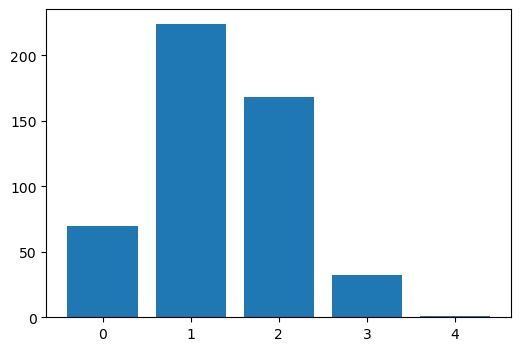

In [12]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6,4))

# Bar chart.
ax.bar(counts[0], counts[1]);

Based on the chart above, if the lady were choosing randomly from the 495 possible combinations, the most likely outcome is that she would correctly identify 1 out of the 4 milk-first cups.

***
### Hypothesis and Evidence

**Null Hypothesis (H₀):**
- The lady cannot distinguish between tea-first and milk-first cups; 
- Any correct identification is due to random chance.

**Alternative Hypothesis (H₁):**
- The lady can correctly identify which cups had tea or milk poured first at a rate higher than would occur by random chance.

**Evidence / Probability under H₀:**
- There are 495 ways to choose 4 milk-first cups out of 12.
- Probability of correctly identifying all 4 milk-first cups by chance is 1/495 ≈ 0.00202

#### Calculations 

In [13]:
# The probability of randomly selecting the four correct cups.
1/495

0.00202020202020202

### Comparing the experiments.


| Experiment | Total Cups | Milk-First Cups | H₀                              | H₁                               | Probability - All Correct by Chance |
| ---------- | ---------- | --------------- | --------------------------------| -------------------------------- | ------------------------------------|
| Original   | 8          | 4               | No distinguish tea or milk first| Lady can distinguish tea vs milk | 1 / 70 ≈ 0.0143                     |
| Extended   | 12         | 4               | No distinguish tea or milk first| Lady can distinguish tea vs milk | 1 / 495 ≈ 0.00202                   |

From the table we can see that as the number of cups increases, the probability of randomly guessing all correctly becomes much smaller.

###  Discussion — Should we keep or slightly tighten the p-value threshold?

In the extended version of the experiment (12 cups: 8 tea-first and 4 milk-first), the chance of randomly getting all 4 milk-first cups correct is:

$ p = \frac{1}{\text{number of combinations}} = \frac{1}{495} \approx 0.002 $

This is much smaller than in the original 8-cup experiment: 

$ p = \frac{1}{70} \approx 0.014 $

As a result in the extended version of the experiment a perfect score (all correct) is about _seven times less likely_ to happen by chance.
That means a perfect result provides _stronger evidence_ against the null hypothesis.
Because of that, the usual significance level of _α = 0.05_ is already conservative — there’s no reason to relax it.

However, the test also becomes harder.

On the other hand, If someone correctly identifies **3 out of 4** milk-first cups, the probability of that happening by chance is:

$ p = \frac{\text{number of 3-overlap combinations}}{495} = \frac{33}{495} \approx 0.067 $

This value (0.067) is slightly above 0.05, meaning it wouldn’t be considered statistically significant at the standard level.

If we want to detect _partial ability_ (someone who’s better than chance but not perfect), we could:

- Keep 'α = 0.05' but change the rule (eg. consider ≥3 correct as evidence), or
- Repeat the experiment multiple times and test the total number of correct guesses.

### End of Problem 1
***

***

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.


### Solution of Problem 2.

In the above problem, we want to understand the difference between two ways of calculating standard deviation: 
- Calculation 1 - for a full population (`ddof=0`).
- Calculation 2 - for a sample (`ddof=1`). 

To explore this, we are taking 100,000 samples from a standard normal distribution, each containing 10 random values. For every sample, we calculate both versions of the standard deviation. This gives us two large collections of SD values that we can compare.

**Importing Libraries**

In [14]:
# Binomial distribution. 
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

**Generating 100,000 random samples each containing 10 random (size = 10)

In [16]:
n_samples = 100000
size_sample = 10

data = np.random.randn(n_samples, size_sample)
data

array([[ 0.89153583,  0.01025783, -0.46359777, ...,  0.10751774,
         1.19125558, -0.79889018],
       [-0.65494218, -0.9688936 , -0.52543648, ..., -0.46065524,
         1.22963567, -0.94334824],
       [ 1.48889305,  0.44608961, -0.84391591, ..., -1.42815561,
         1.48318139,  0.37385872],
       ...,
       [ 1.44176608, -1.99742298,  1.11763925, ...,  0.10714737,
         0.69045855,  0.99551401],
       [-0.191193  , -0.37598918, -0.10580467, ..., -0.33418499,
        -1.16153212, -0.88189531],
       [-1.36043464,  0.09845287, -2.20680891, ...,  0.97916648,
         0.29249076, -0.13026198]])